In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('DataCUSAAssgn1_2.xls')
data.head()

,Srl No,1,2,3,4,5,6,7,8,9,...,Phone,SoftDrink,Newspaper,ShowerGel,Hand sanitizers,Face washes,Hair conditioner,Tea_Coffee,Gender,Occupation
0,1,4,9,4,6,9,8,9,8,8,...,Samsung,Cola,Economic Times,3,4,4,3,1,1,1
1,2,9,6,9,1,5,9,8,8,9,...,Others,Orange,The Hindu,1,2,2,3,1,1,1
2,3,4,6,5,7,6,5,0,5,3,...,HTC,Fruit flavour,Times of India,2,3,4,3,2,1,1
3,4,6,9,5,10,10,5,6,5,4,...,Others,I do not consume soft drinks at all,The Hindu,3,3,4,3,1,2,1
4,5,8,1,9,7,8,9,1,1,7,...,Others,Fruit flavour,Economic Times,2,3,2,2,1,1,1


In [8]:
bevrages = data.loc[:,[1,2,3,4,5,15,6,7,8,9,10,11,12,13,14,15,'SoftDrink']]
bevrages.head()

,1,2,3,4,5,15,6,7,8,9,10,11,12,13,14,15,SoftDrink
0,4,9,4,6,9,7,8,9,8,8,8,8,4,6,7,7,Cola
1,9,6,9,1,5,2,9,8,8,9,5,2,8,1,8,2,Orange
2,4,6,5,7,6,3,5,0,5,3,7,0,4,3,7,3,Fruit flavour
3,6,9,5,10,10,6,5,6,5,4,6,5,7,6,10,6,I do not consume soft drinks at all
4,8,1,9,7,8,2,9,1,1,7,9,6,1,7,8,2,Fruit flavour


In [9]:
bevs = sorted(bevrages.SoftDrink.unique())

## Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
l = LabelEncoder()
a = l.fit_transform(bevrages.SoftDrink)
bevrages['SoftDrink'] = a
bevrages.head()

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1,2,3,4,5,15,6,7,8,9,10,11,12,13,14,15,SoftDrink
0,4,9,4,6,9,7,8,9,8,8,8,8,4,6,7,7,0
1,9,6,9,1,5,2,9,8,8,9,5,2,8,1,8,2,3
2,4,6,5,7,6,3,5,0,5,3,7,0,4,3,7,3,1
3,6,9,5,10,10,6,5,6,5,4,6,5,7,6,10,6,2
4,8,1,9,7,8,2,9,1,1,7,9,6,1,7,8,2,1


## Standardization

In [11]:
std = StandardScaler()
bevrages_std = std.fit_transform(bevrages.drop(['SoftDrink','Gender'],axis=1))
bevrages_std = pd.DataFrame(bevrages_std)
bevrages_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.669327,1.431301,-0.854184,0.087155,0.640937,0.838655,0.971368,1.424440,0.762075,0.856379,0.491722,1.386203,-0.105320,0.373217,0.149174,0.838655
1,1.073712,0.297597,0.972948,-1.526832,-0.830368,-0.968791,1.296240,1.114442,0.762075,1.169784,-0.611205,-0.648590,1.161687,-1.292931,0.452066,-0.968791
2,-0.669327,0.297597,-0.488758,0.409953,-0.462541,-0.607302,-0.003249,-1.365540,-0.233017,-0.710646,0.124079,-1.326855,-0.105320,-0.626472,0.149174,-0.607302
3,0.027889,1.431301,-0.488758,1.378345,1.008763,0.477166,-0.003249,0.494446,-0.233017,-0.397241,-0.243563,0.368806,0.844935,0.373217,1.057850,0.477166
4,0.725104,-1.591909,0.972948,0.409953,0.273111,-0.968791,1.296240,-1.055543,-1.559807,0.542974,0.859364,0.707939,-1.055575,0.706447,0.452066,-0.968791


In [13]:
bevrages_std['SoftDrink'] = bevrages.loc[:,'SoftDrink']
bevrages_std.columns = bevrages.columns

## Clustering

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
links = linkage(y=bevrages_std,method='complete')
links.shape

(399, 4)

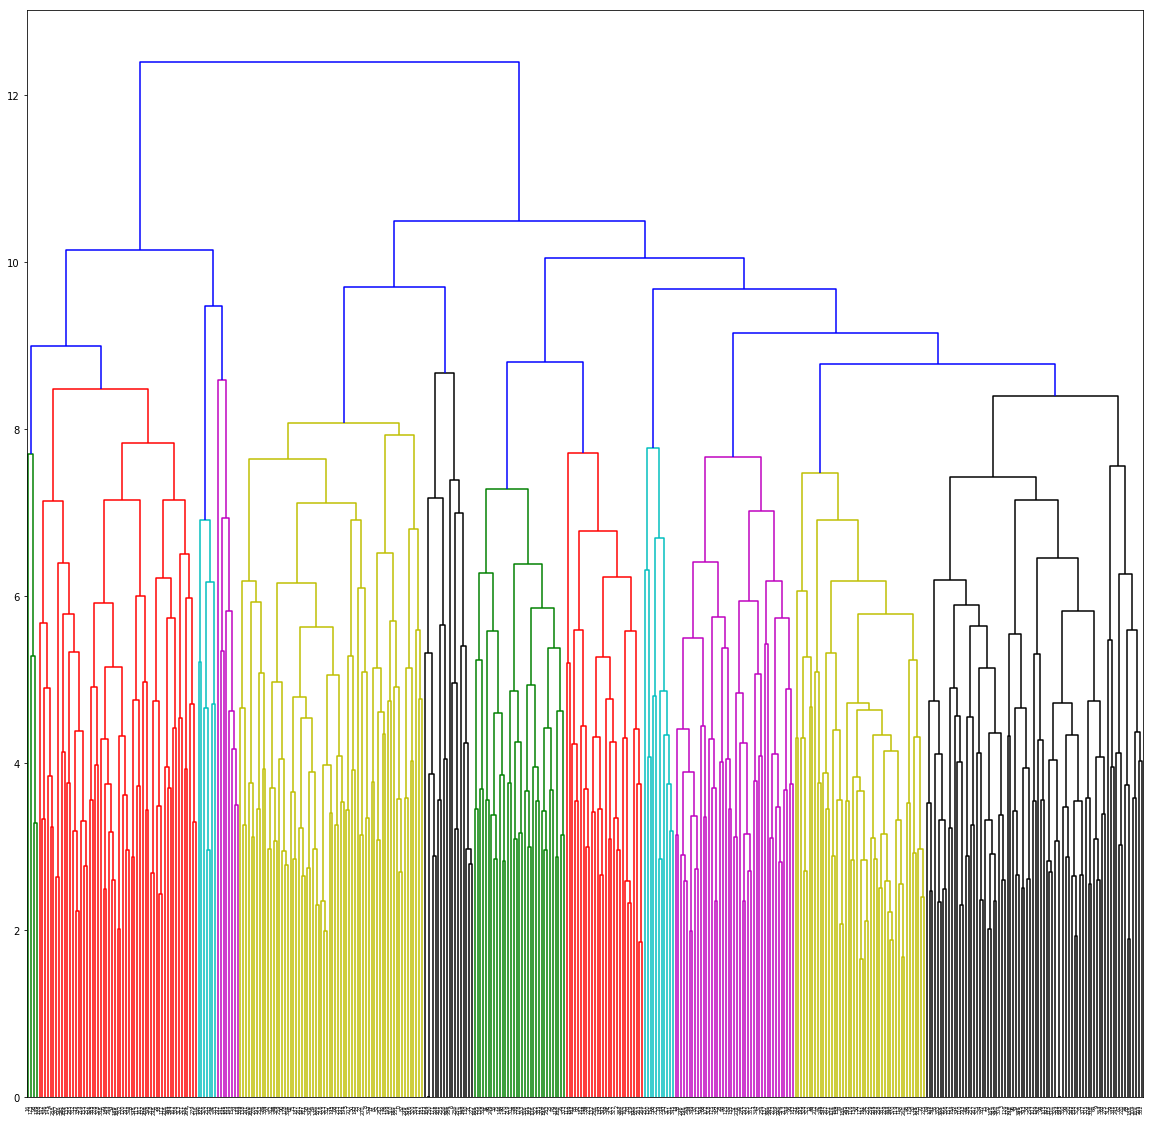

In [15]:
plt.figure(figsize=[20,20])
dendrogram(links)
plt.show()

In [18]:
c = cut_tree(links,height=10.4)
print(max(c)) 
C_df = pd.DataFrame(c)
C_df[0].value_counts()

[2]


1    240
0     84
2     76
Name: 0, dtype: int64

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X=bevrages_std,labels=c)

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03750445280853299

In [20]:
bevrages['bev_clusters'] = np.nan
bevrages['bev_clusters'] = c
bevrages.bev_clusters.value_counts()

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    240
0     84
2     76
Name: bev_clusters, dtype: int64

In [21]:
for i in sorted(bevrages.SoftDrink.unique()):
    print(i)
    print(bevs[i])
    bevrages.loc[bevrages.SoftDrink == i,'SoftDrink'] = bevs[i]

0
Cola
1
Fruit flavour
2
I do not consume soft drinks at all
3
Orange
4
White/ Colourless


C:\Users\nitis\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
bevrages.head()

,1,2,3,4,5,15,6,7,8,9,10,11,12,13,14,15,SoftDrink,bev_clusters
0,4,9,4,6,9,7,8,9,8,8,8,8,4,6,7,7,Cola,0
1,9,6,9,1,5,2,9,8,8,9,5,2,8,1,8,2,Orange,1
2,4,6,5,7,6,3,5,0,5,3,7,0,4,3,7,3,Fruit flavour,1
3,6,9,5,10,10,6,5,6,5,4,6,5,7,6,10,6,I do not consume soft drinks at all,1
4,8,1,9,7,8,2,9,1,1,7,9,6,1,7,8,2,Fruit flavour,2


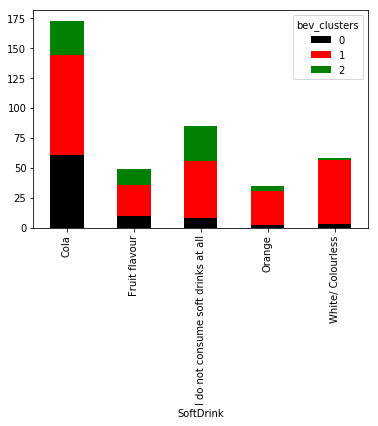

In [23]:
var = bevrages.groupby(['SoftDrink','bev_clusters']).SoftDrink.count()
var.unstack().plot(kind='bar',stacked=True,  color=['black','red','green'], grid=False)

In [24]:
print(bevrages[bevrages['bev_clusters']==0]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==1]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==2]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==3]['SoftDrink'].value_counts())

Cola                                   61
Fruit flavour                          10
I do not consume soft drinks at all     8
White/ Colourless                       3
Orange                                  2
Name: SoftDrink, dtype: int64
Cola                                   83
White/ Colourless                      54
I do not consume soft drinks at all    48
Orange                                 29
Fruit flavour                          26
Name: SoftDrink, dtype: int64
I do not consume soft drinks at all    29
Cola                                   29
Fruit flavour                          13
Orange                                  4
White/ Colourless                       1
Name: SoftDrink, dtype: int64
Series([], Name: SoftDrink, dtype: int64)


In [25]:
def dictionary(df):
    dict1 = {}
    for i in range(0,5):
        try:
            key,val = df.value_counts().index[i],df.value_counts()[df.value_counts().index[i]]
            dict1[key] = val
        except:
            pass
    return dict1

In [26]:
a = dictionary(bevrages.SoftDrink)
b = dictionary(bevrages[bevrages['bev_clusters']==0]['SoftDrink'])
b1 = dictionary(bevrages[bevrages['bev_clusters']==1]['SoftDrink'])
b2 = dictionary(bevrages[bevrages['bev_clusters']==2]['SoftDrink'])

In [27]:
a.keys()
def perc(main,sec):
    dict2 = {}
    for i in sorted(a.keys()):
        try:
            print(i,'-->',sec[i])
            print(i,'-->',main[i])
            dict2[i] = (sec[i]/main[i])*100
        except:
            print(i)
            pass
    return dict2

In [28]:
x = perc(a,b)
x1 = perc(a,b1)
x2 = perc(a,b2)

Cola --> 61
Cola --> 173
Fruit flavour --> 10
Fruit flavour --> 49
I do not consume soft drinks at all --> 8
I do not consume soft drinks at all --> 85
Orange --> 2
Orange --> 35
White/ Colourless --> 3
White/ Colourless --> 58
Cola --> 83
Cola --> 173
Fruit flavour --> 26
Fruit flavour --> 49
I do not consume soft drinks at all --> 48
I do not consume soft drinks at all --> 85
Orange --> 29
Orange --> 35
White/ Colourless --> 54
White/ Colourless --> 58
Cola --> 29
Cola --> 173
Fruit flavour --> 13
Fruit flavour --> 49
I do not consume soft drinks at all --> 29
I do not consume soft drinks at all --> 85
Orange --> 4
Orange --> 35
White/ Colourless --> 1
White/ Colourless --> 58


([<matplotlib.axis.XTick at 0x1afdb7dac88>,
 <a list of 5 Text xticklabel objects>)

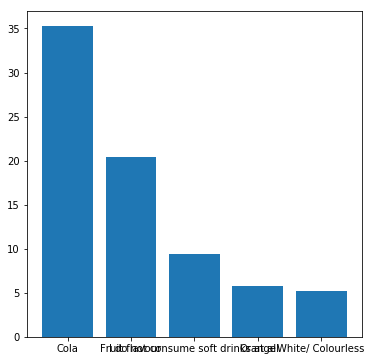

In [29]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x)), x.values(), align='center')
plt.xticks(range(len(x)), list(x.keys()))

([<matplotlib.axis.XTick at 0x1afdb7c0ba8>,
 <a list of 5 Text xticklabel objects>)

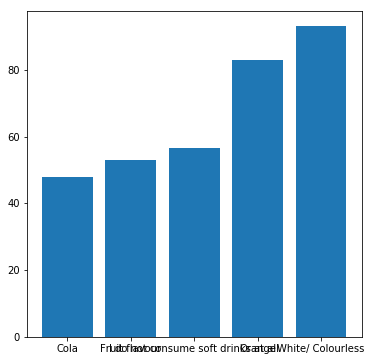

In [30]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x1)), x1.values(), align='center',)
plt.xticks(range(len(x1)), list(x1.keys()))

([<matplotlib.axis.XTick at 0x1afdb2c74a8>,
 <a list of 5 Text xticklabel objects>)

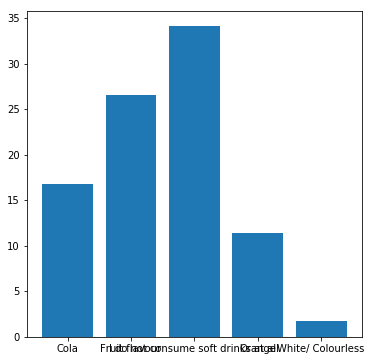

In [31]:
plt.figure(figsize=(6,6))
plt.bar(range(len(x2)),x2.values(), align='center')
plt.xticks(range(len(x2)), list(x2.keys()))

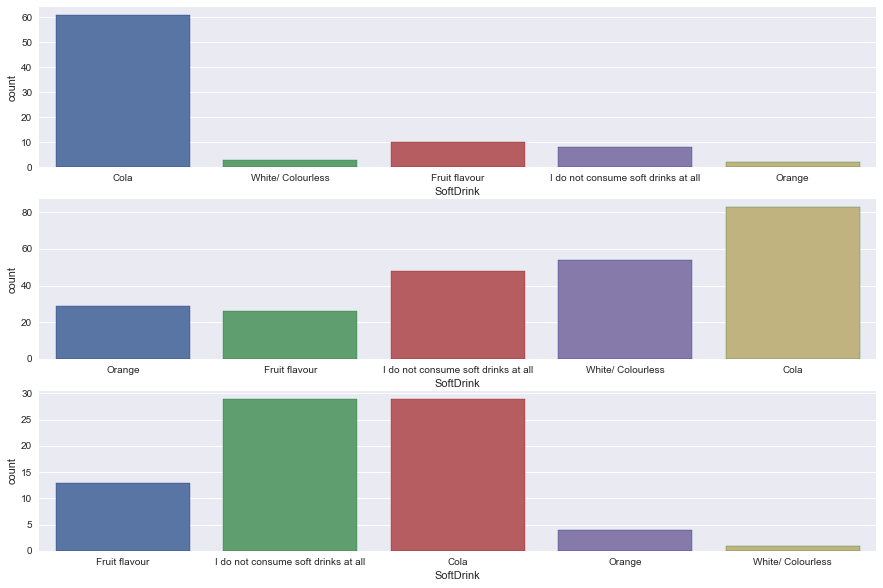

In [32]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
for i in sorted(z):
    plt.subplot(3,1,i+1)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x="SoftDrink", data=bevrages[bevrages['bev_clusters']==i][['SoftDrink','bev_clusters']],edgecolor=sns.color_palette("dark", 3));

In [33]:
bevrages.columns

Index([             1,              2,              3,              4,
                    5,             15,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
          'SoftDrink', 'bev_clusters'],
      dtype='object')

# 2 - I always use new brands…

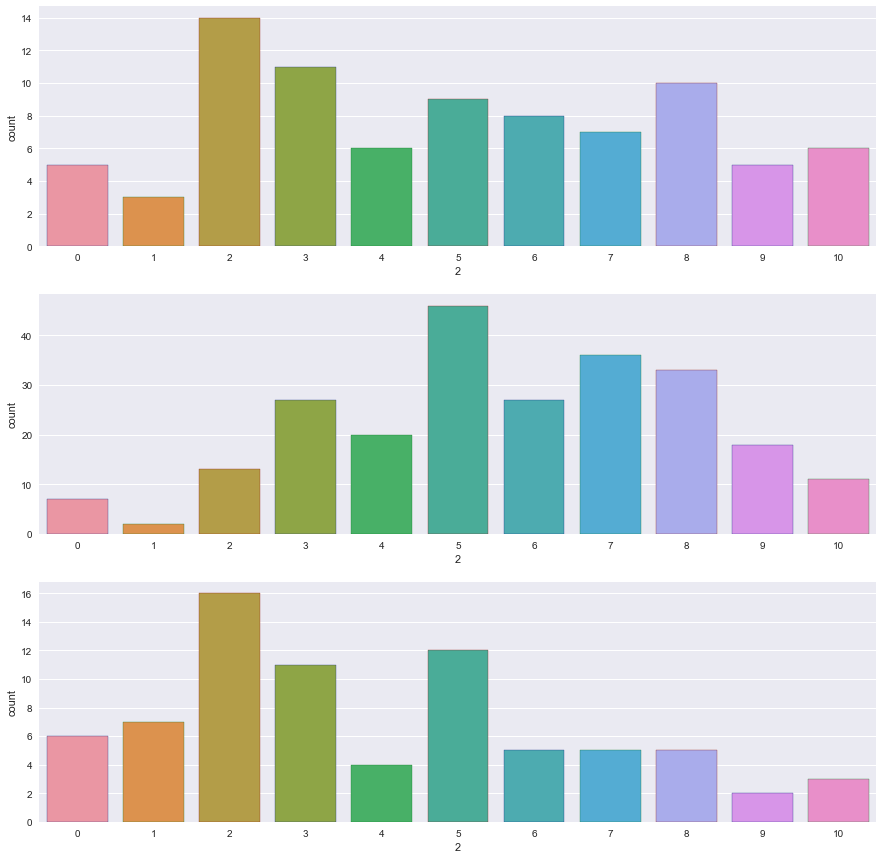

In [34]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=2, data=bevrages[bevrages['bev_clusters']==i][[2,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 3 - Weekends at home with family…

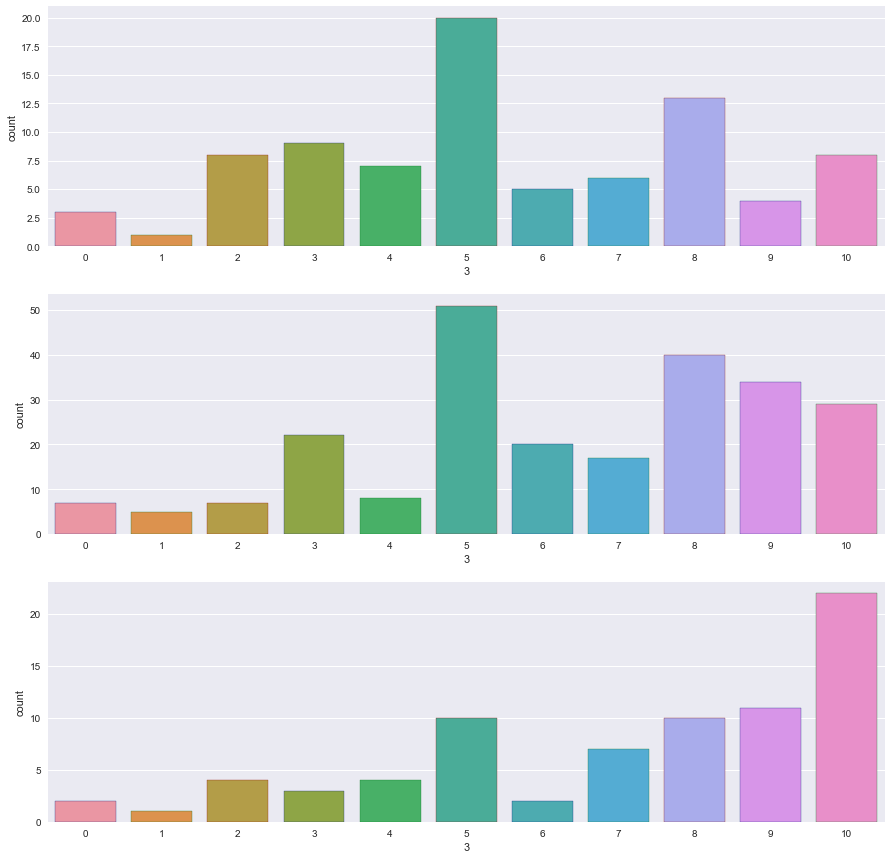

In [35]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=3, data=bevrages[bevrages['bev_clusters']==i][[3,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 4 - Buy more by impulse while shopping…

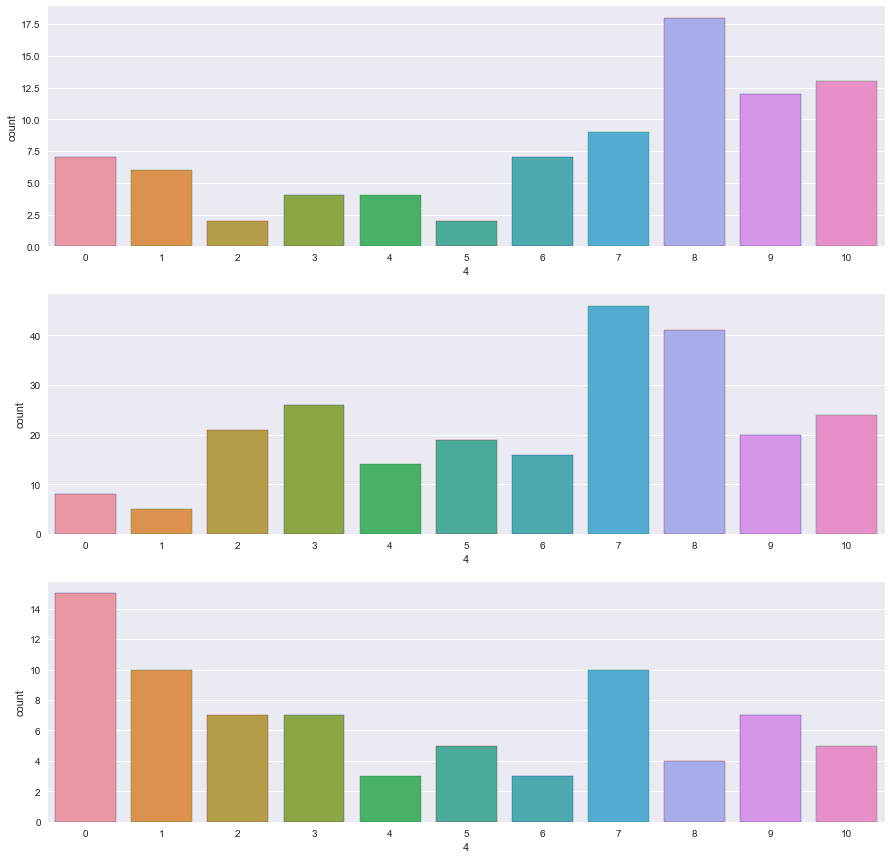

In [36]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=4, data=bevrages[bevrages['bev_clusters']==i][[4,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 6 -  Prefer reading, music rather than sports wctivities

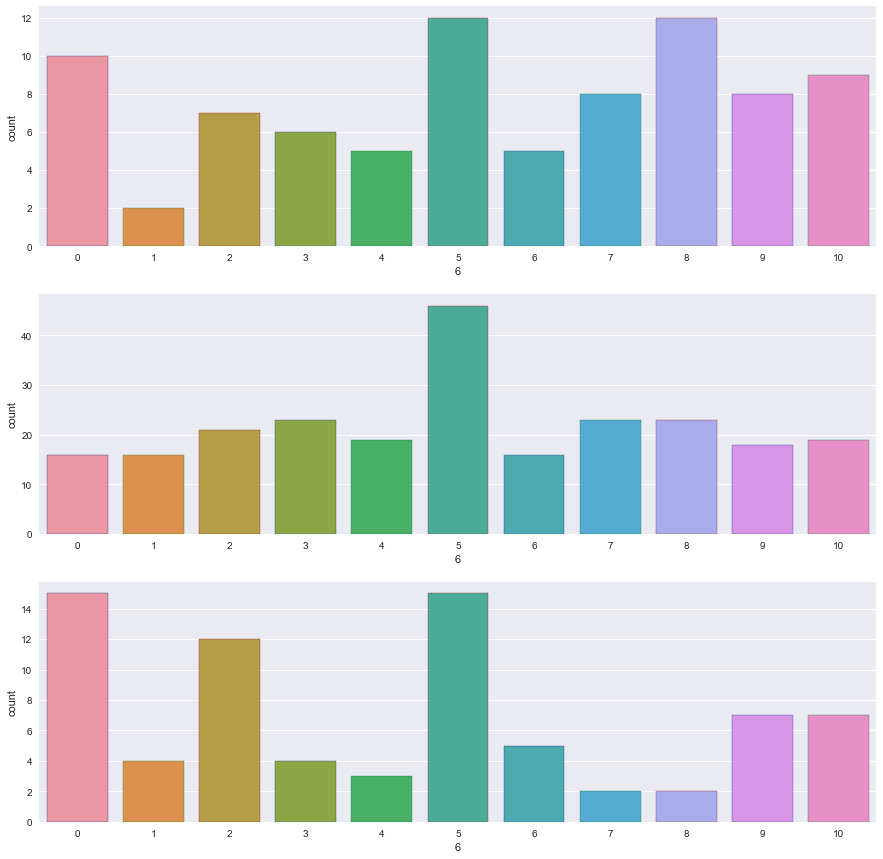

In [37]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=6, data=bevrages[bevrages['bev_clusters']==i][[6,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 7 - Watch movies in first few days of release

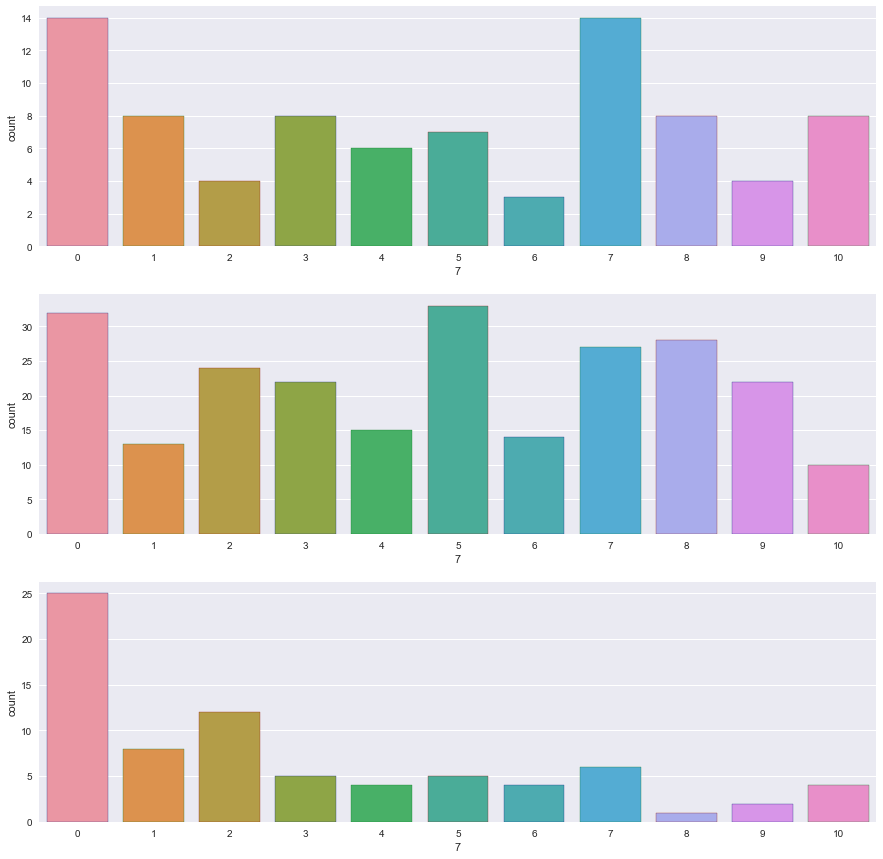

In [38]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=7, data=bevrages[bevrages['bev_clusters']==i][[7,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 9 - Some physical exercise everyday

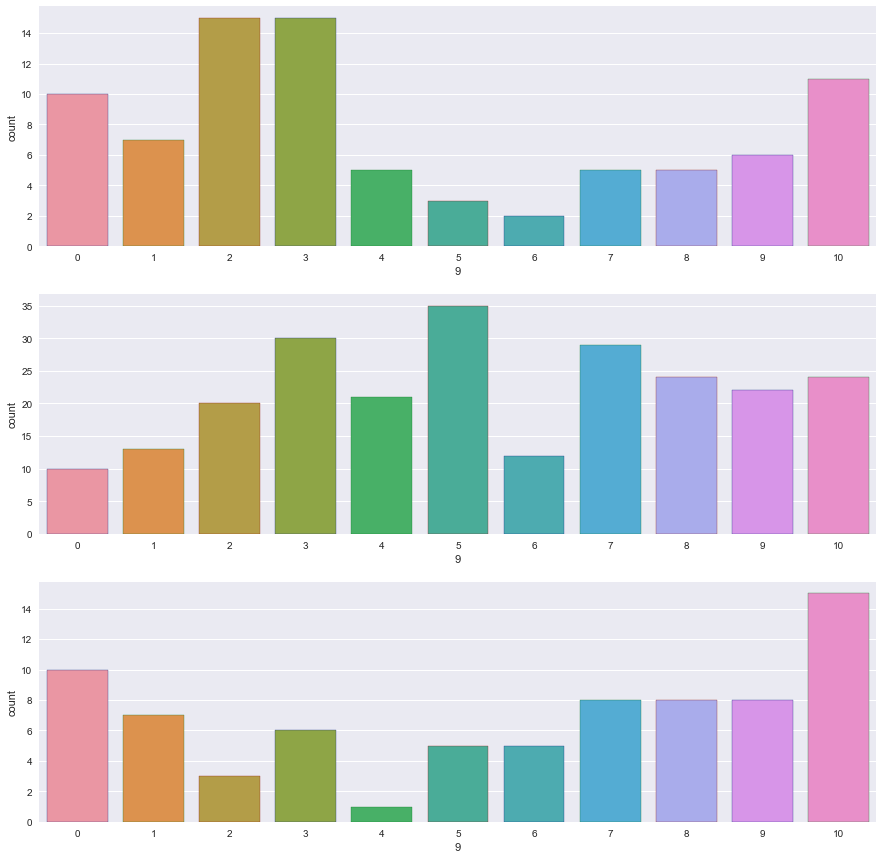

In [39]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=9, data=bevrages[bevrages['bev_clusters']==i][[9,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

# 15 - When I see a new, interesting ad I most often end up buying the brand

TypeError: cannot label index with a null key

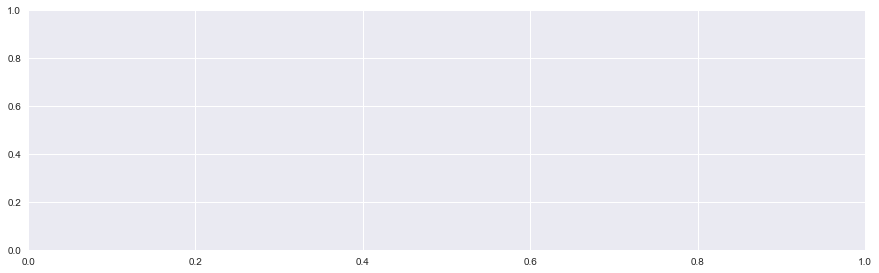

In [40]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x=15, data=bevrages[bevrages['bev_clusters']==i][[15,'bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

KeyError: "['Gender'] not in index"

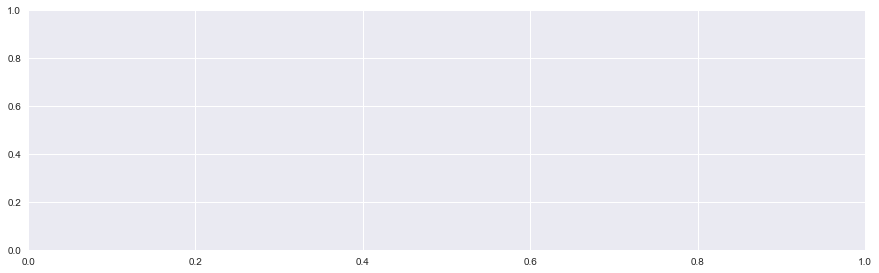

In [41]:
plt.figure(figsize=(15,15))
sns.set(style="darkgrid",color_codes=True)
z = bevrages.bev_clusters.unique()
counter = 1
for i in sorted(z):
    plt.subplot(3,1,counter)
    #sns.countplot(data1[data1['bev_clusters']==i]['SoftDrink'])
    sns.countplot(x='Gender', data=bevrages[bevrages['bev_clusters']==i][['Gender','bev_clusters']],edgecolor=sns.color_palette("dark", 3));
    counter = counter+1

In [42]:
silhouette_score(X=bevrages_std,labels=c)

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03750445280853299

In [53]:
from sklearn.decomposition import PCA
p = PCA(n_components = 16)

In [54]:
df_pcs = pd.DataFrame(p.fit_transform(bevrages_std.drop(['SoftDrink'],axis=1)))
df_pcs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.460140,0.132992,0.225706,0.385990,-0.353767,-0.154898,-0.126255,0.007971,0.132938,-1.005734,-1.051940,0.964218,-0.123541,-0.715920,-1.282856,-1.945099e-16
1,1.047299,-1.474018,-0.340955,1.446626,0.770297,-0.023674,-2.156236,1.106419,-0.527650,0.791429,-0.071757,0.871032,-0.872815,-1.191131,-0.426449,-1.072074e-16
2,1.335970,0.670478,-0.007366,-0.577494,-0.133821,0.148755,0.871122,-0.030135,-0.961217,0.110191,0.970215,0.860099,-0.104352,-0.175662,0.703022,-1.390900e-16
3,-1.931663,0.022497,-0.097202,-0.066331,-0.287823,0.769383,0.441006,0.978876,0.108990,-1.106294,0.275976,0.443326,0.279438,-0.314504,1.013242,-4.196981e-17
4,1.788710,0.344316,-1.323225,0.749502,0.544713,0.358828,0.908852,-0.416309,1.744485,-0.363835,0.400384,-1.268036,0.976008,-1.071233,-0.778751,-2.417160e-16


In [55]:
p.explained_variance_ratio_

array([1.73286735e-01, 1.09437811e-01, 8.18632737e-02, 7.41573519e-02,
       7.14798344e-02, 6.81422844e-02, 6.08690685e-02, 5.92445490e-02,
       5.10819288e-02, 5.01072467e-02, 4.51296486e-02, 4.33402654e-02,
       4.11448868e-02, 3.81231606e-02, 3.25919553e-02, 1.48473908e-33])

In [57]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import  KMeans

In [59]:
km = KMeans(n_clusters=4)

In [60]:
fit1 = km.fit(df_pcs)

In [61]:
silhouette_score(X=df_pcs,labels=fit1.labels_)

0.06877017981501751

In [62]:
fit1.labels_

array([2, 3, 1, 2, 1, 2, 3, 3, 0, 3, 0, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 2,
       2, 0, 2, 0, 0, 3, 2, 3, 3, 0, 0, 1, 0, 1, 0, 3, 2, 3, 2, 1, 3, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 3, 3, 2, 2, 2, 3, 1, 1,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 0, 2, 1, 3, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 3, 1, 2, 0, 0, 0, 2, 3, 3,
       1, 3, 2, 3, 1, 3, 0, 1, 3, 1, 1, 1, 3, 0, 2, 0, 1, 0, 2, 2, 1, 2,
       3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 0, 1, 0, 3, 1, 3, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 3, 3, 0, 1, 0, 1, 1, 2, 0,
       3, 2, 2, 2, 1, 0, 2, 2, 1, 2, 3, 3, 0, 1, 1, 0, 3, 1, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 0, 2, 0,
       3, 1, 3, 2, 3, 0, 1, 0, 1, 2, 2, 0, 3, 0, 2, 3, 2, 2, 3, 1, 1, 3,
       3, 2, 3, 2, 0, 3, 3, 3, 0, 0, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3,
       3, 1, 1, 3, 0, 3, 1, 2, 1, 1, 2, 3, 1, 0, 2,

In [63]:
bevrages.bev_clusters = fit1.labels_

C:\Users\nitis\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [64]:
print(bevrages[bevrages['bev_clusters']==0]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==1]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==2]['SoftDrink'].value_counts())
print(bevrages[bevrages['bev_clusters']==3]['SoftDrink'].value_counts())

Cola                                   42
I do not consume soft drinks at all    19
Fruit flavour                          12
White/ Colourless                       9
Orange                                  9
Name: SoftDrink, dtype: int64
Cola                                   52
White/ Colourless                      21
I do not consume soft drinks at all    14
Fruit flavour                          12
Orange                                  8
Name: SoftDrink, dtype: int64
Cola                                   55
I do not consume soft drinks at all    19
White/ Colourless                      18
Fruit flavour                          12
Orange                                 11
Name: SoftDrink, dtype: int64
I do not consume soft drinks at all    33
Cola                                   24
Fruit flavour                          13
White/ Colourless                      10
Orange                                  7
Name: SoftDrink, dtype: int64


In [65]:
df_overall = pd.concat([df_pcs, bevrages_std], axis = 1)
df_overall.head()

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,13,14,15,SoftDrink
0,-2.460140,0.132992,0.225706,0.385990,-0.353767,-0.154898,-0.126255,0.007971,0.132938,-1.005734,...,1.424440,0.762075,0.856379,0.491722,1.386203,-0.105320,0.373217,0.149174,0.838655,0
1,1.047299,-1.474018,-0.340955,1.446626,0.770297,-0.023674,-2.156236,1.106419,-0.527650,0.791429,...,1.114442,0.762075,1.169784,-0.611205,-0.648590,1.161687,-1.292931,0.452066,-0.968791,3
2,1.335970,0.670478,-0.007366,-0.577494,-0.133821,0.148755,0.871122,-0.030135,-0.961217,0.110191,...,-1.365540,-0.233017,-0.710646,0.124079,-1.326855,-0.105320,-0.626472,0.149174,-0.607302,1
3,-1.931663,0.022497,-0.097202,-0.066331,-0.287823,0.769383,0.441006,0.978876,0.108990,-1.106294,...,0.494446,-0.233017,-0.397241,-0.243563,0.368806,0.844935,0.373217,1.057850,0.477166,2
4,1.788710,0.344316,-1.323225,0.749502,0.544713,0.358828,0.908852,-0.416309,1.744485,-0.363835,...,-1.055543,-1.559807,0.542974,0.859364,0.707939,-1.055575,0.706447,0.452066,-0.968791,1


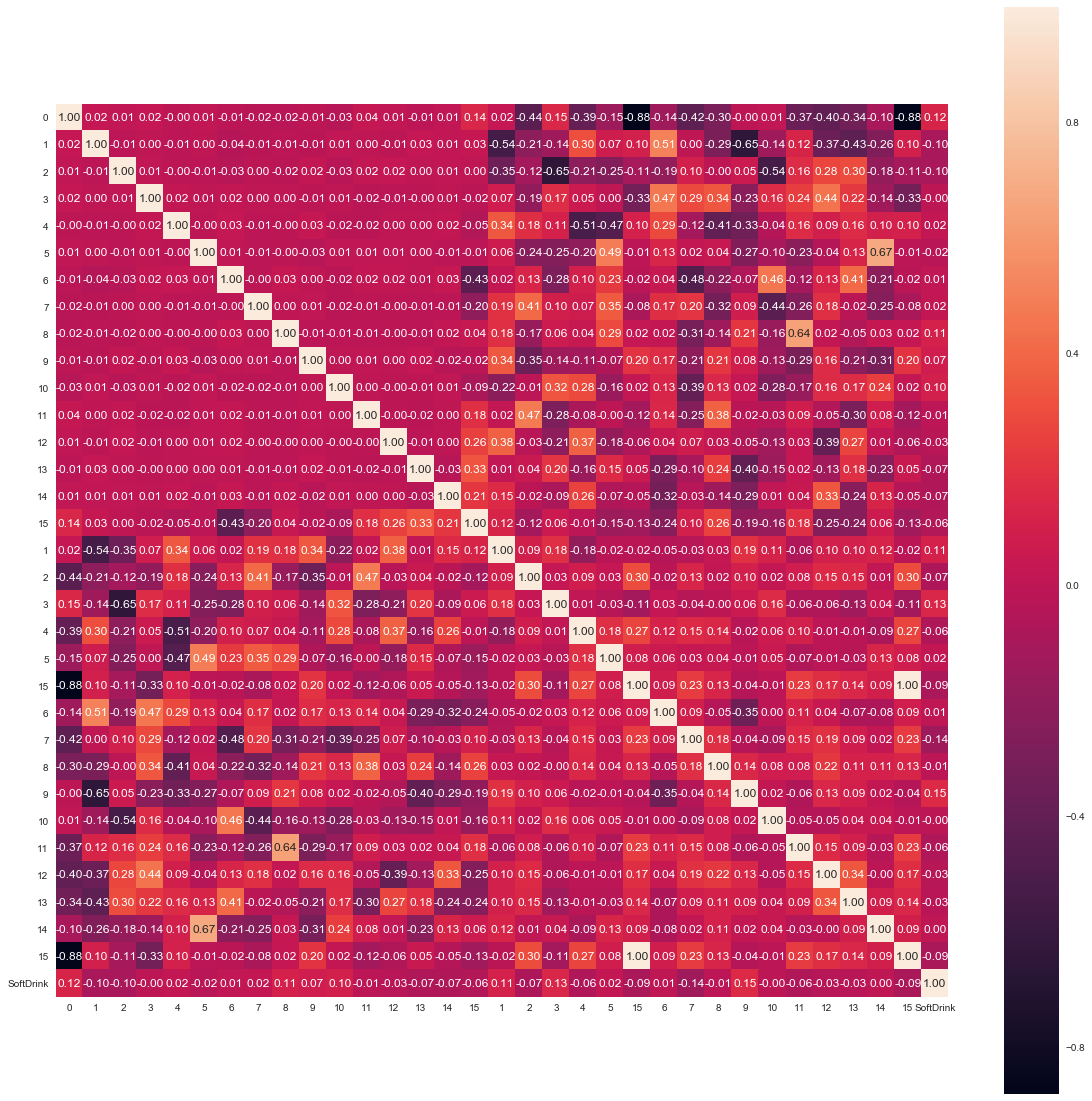

In [67]:
c = df_overall.corr(method='spearman')
sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(20,20)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=df_overall.columns.values, xticklabels=df_overall.columns.values)

In [91]:
p.explained_variance_ratio_

array([0.24526793, 0.16775682, 0.14518064, 0.10744393, 0.091827  ,
       0.09140501, 0.06801433, 0.06280602])

In [92]:
2,4,15,3,6,7,9,'SoftDrink'

(2, 4, 15, 3, 6, 7, 9, 'SoftDrink')

In [93]:
print("Q2" )
print(round(0.21466441 * 0.70 * 100))

#print("Relative Importance of V15 - When I see a new, interesting ad I most often end up buying the brand  : " )
#print(round(0.2076631 * 0.63 * 100))

#print("Relative Importance of V8 - I order for everyone while eating out  : " )
#print(round(0.1509153 * 0.62 * 100))

Q2
15


In [94]:
bevrages_std.head()

,2,4,15,3,6,7,9,SoftDrink,Gender
0,1.431301,0.087155,0.838655,-0.854184,0.971368,1.424440,0.856379,0,1
1,0.297597,-1.526832,-0.968791,0.972948,1.296240,1.114442,1.169784,3,1
2,0.297597,0.409953,-0.607302,-0.488758,-0.003249,-1.365540,-0.710646,1,1
3,1.431301,1.378345,0.477166,-0.488758,-0.003249,0.494446,-0.397241,2,2
4,-1.591909,0.409953,-0.968791,0.972948,1.296240,-1.055543,0.542974,1,1


In [95]:
k = bevrages_std.loc[:,[15,6,3,'SoftDrink']]

In [96]:
k.head()

,15,6,3,SoftDrink
0,0.838655,0.971368,-0.854184,0
1,-0.968791,1.296240,0.972948,3
2,-0.607302,-0.003249,-0.488758,1
3,0.477166,-0.003249,-0.488758,2
4,-0.968791,1.296240,0.972948,1


In [97]:
km1 = KMeans(n_clusters=3, n_init=100)
km1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
fit2 = km1.fit(k)

In [99]:
fit2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
silhouette_score(X=k,labels=fit2.labels_)

0.21329810115723685

In [101]:
bevrages_std.bev_clusters = fit2.labels_

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [102]:
print(data1[data1['bev_clusters']==0]['SoftDrink'].value_counts())
print(data1[data1['bev_clusters']==1]['SoftDrink'].value_counts())
print(data1[data1['bev_clusters']==2]['SoftDrink'].value_counts())
print(data1[data1['bev_clusters']==3]['SoftDrink'].value_counts())

NameError: name 'data1' is not defined

In [103]:
data1.head()

NameError: name 'data1' is not defined